In [80]:
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# This line will hide code by default when the notebook is exported as HTML
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
dataset = pd.read_csv ('Analysis of Excretions.csv')
dataset.head()

,Label,Sex,Group,Housing,Day1,D1Category,Day2,D2Category,Day3,D3Category,Total,TotalCategory
0,10A1,Male,P,(+Male+Cover),10,med,6,med,2,low,18,high
1,10B1,Male,P,(+Male+Cover),11,high,0,low,8,med,19,high
2,6A1,Male,P,(+Male+Cover),0,low,0,low,0,low,0,low
3,6B1,Male,P,(+Male+Cover),5,med,0,low,5,med,10,med
4,49C1,Male,P,(+Male+Cover),0,low,0,low,0,low,0,low


In [48]:
dataset = dataset[['Sex', 'Group', 'Housing', 'Day1', 'Day2', 'Day3', 'Total']]
dataset.head()

,Sex,Group,Housing,Day1,Day2,Day3,Total
0,Male,P,(+Male+Cover),10,6,2,18
1,Male,P,(+Male+Cover),11,0,8,19
2,Male,P,(+Male+Cover),0,0,0,0
3,Male,P,(+Male+Cover),5,0,5,10
4,Male,P,(+Male+Cover),0,0,0,0


In [49]:
def classify_excretion (number):
    if number == 0:
        return "0"
    else:
        return "1"

In [50]:
dataset ['Day1_binary'] = dataset['Day1'].apply(classify_excretion)
dataset ['Day2_binary'] = dataset['Day2'].apply(classify_excretion)
dataset ['Day3_binary'] = dataset['Day3'].apply(classify_excretion)
dataset ['Total_binary'] = dataset['Total'].apply(classify_excretion)

In [51]:
# Encoding the categorical variables
dataset = pd.get_dummies(dataset, columns= ["Sex","Group","Housing"], prefix= ["Sex","Group","Housing"])

In [52]:
dataset.head()

,Day1,Day2,Day3,Total,Day1_binary,Day2_binary,Day3_binary,Total_binary,Sex_Female,Sex_Male,Group_P,Group_S,Housing_(+Male+Cover),Housing_(+Male-Cover),Housing_(-Male+Cover),Housing_(-Male-Cover)
0,10,6,2,18,1,1,1,1,0,1,1,0,1,0,0,0
1,11,0,8,19,1,0,1,1,0,1,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,5,0,5,10,1,0,1,1,0,1,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0


In [61]:
# creating matrix of features to identify the dependent factor vs independent factors (parameters)
# Avoid the dummy variable trap is done by dropping 1 dummy variable from each category. Some libraries do it for you 
X = dataset.iloc[:, [8,10]].values  
y = dataset.iloc[:, 4].values 

In [63]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) # you can ommit random_state. It 
# keeps the same random sample for all sampling trials OR you can choose different value.

In [64]:
# Feature Scaling. This for bringing large and small values of different parameters on the same scale.
# Here we will use Standardisation Scale.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # X_train needs for fit and transform
X_test = sc_X.transform(X_test)       # X_test needs for only transform

# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.transform(y_test)

C:\Users\omar_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [65]:
# A) Fitting Logistic Regression to the Training set
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  0],
       [31,  0]])

In [354]:
# Applying k-Fold Cross Validation (evaluating the model performance)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.45454545  0.36363636  0.54545455  0.7         0.66666667  0.22222222
  0.33333333  0.55555556  0.22222222  0.77777778]
0.484141414141
0.187172589356


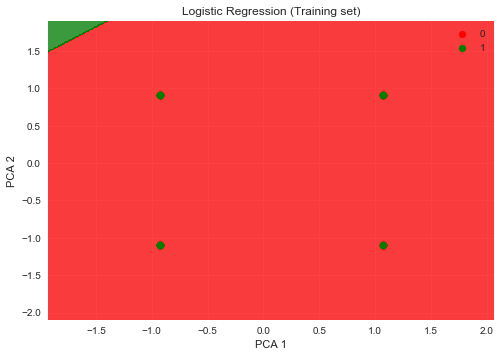

In [67]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

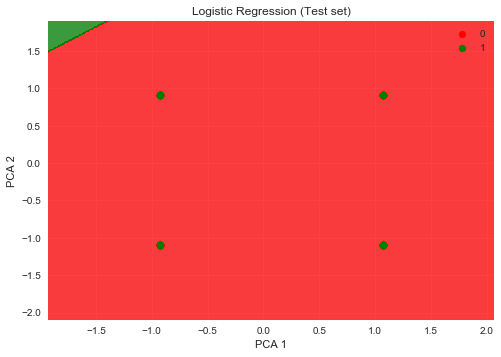

In [68]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [69]:
# B) Fitting KNN to the Training set
# Creating KNN class (classifier)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [356]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 25],
       [15, 39]])

In [357]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.63636364  0.63636364  0.72727273  0.8         0.66666667  0.22222222
  0.66666667  0.55555556  0.66666667  0.66666667]
0.624444444444
0.146743586697


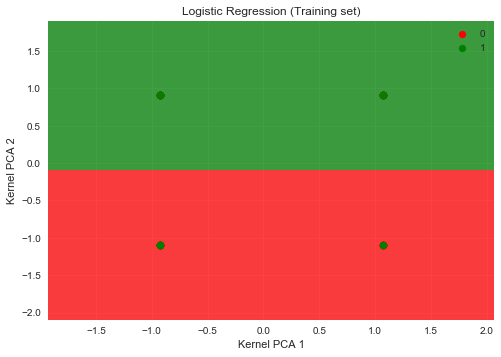

In [70]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

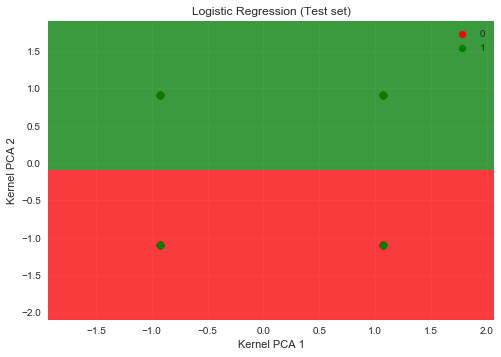

In [71]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

In [72]:
# C) Fitting SVC to the Training set. The assumption is that the data is linearly separable.
# Creating SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  0],
       [31,  0]])

In [360]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.45454545  0.27272727  0.45454545  0.8         0.66666667  0.22222222
  0.55555556  0.55555556  0.44444444  0.77777778]
0.520404040404
0.182477368463


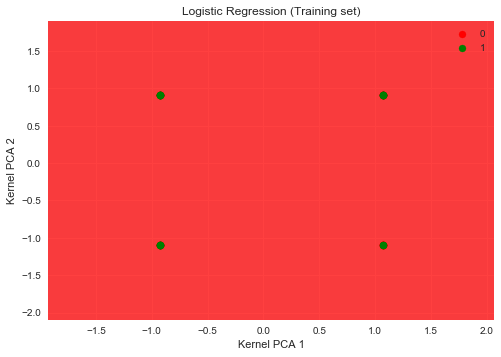

In [74]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

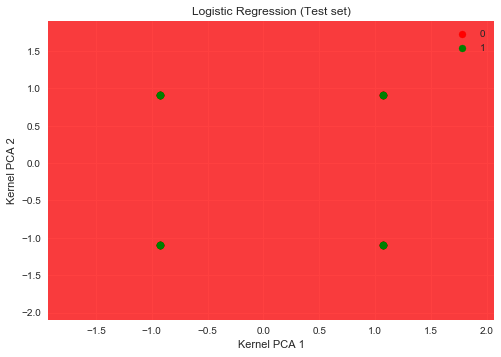

In [75]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

In [76]:
# D) Fitting kernel SVC to the Training set. The assumption is that the data is NOT-linearly separable.
# Creating kernel SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  0],
       [31,  0]])

In [363]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.63636364  0.54545455  0.72727273  0.6         0.66666667  0.22222222
  0.66666667  0.66666667  0.55555556  0.66666667]
0.595353535354
0.135184728144


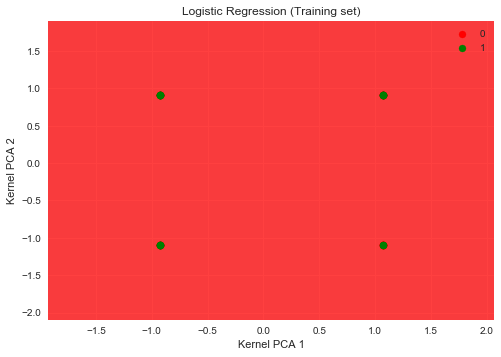

In [78]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

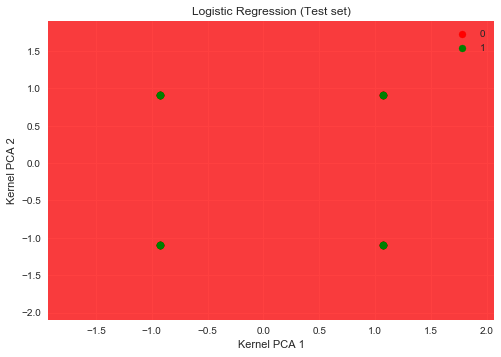

In [79]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

In [366]:
# Applying Grid Search to find the best model and the best parameters. Here is just the code. Excuting the code on many
# independent variables is time and computation comsuming. We will do it after dimentionality reduction.
"""from sklearn.model_selection import GridSearchCV
parameters = [{"C": [1000, 1500, 2000, 3000], 'kernel': ['linear']},
              {"C": [1000, 1500, 2000, 3000], 'kernel': ['rbf'], 'gamma': [0.05, 0.01, 0.02, 0.03, 0.04]}] #if you get 0.5 as the best
                                                    # then exchange 0.001 and 0.0001 by 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,and 0.9
grid_search = GridSearchCV (estimator = classifier,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit (X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_ """

In [367]:
# print (best_accuracy)
# print (best_parameters)

0.659793814433
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
""" Day1 Logestic Regression

array
([[66,  0],
  [31,  0]])

[ 0.7         0.7         0.7         0.7         0.7         0.7         0.7   0.66666667  0.66666667  0.66666667]

accuracies.mean = 0.69

accuracies.std = 0.0152752523165 

Day1 KNN

array([[50, 16],
       [25,  6]])
       
[ 0.5         0.6         0.7         0.7         0.6         0.7         0.6
  0.77777778  0.55555556  0.55555556]
0.628888888889
0.0819816299809  

Day1 SVC

array([[66,  0],
       [31,  0]])
       
[ 0.7         0.7         0.7         0.7         0.7         0.7         0.7
  0.66666667  0.66666667  0.66666667]
0.69
0.0152752523165 

Day1 Kernel SVC

array([[66,  0],
       [31,  0]])
       
[ 0.7         0.5         0.7         0.7         0.7         0.7         0.6
  0.66666667  0.66666667  0.55555556]
0.648888888889
0.0685295286449    """

In [ ]:
"""Day2 Logestic Regression

array([[41, 15],
       [31, 10]])

[ 0.63636364  0.36363636  0.4         0.6         0.6         0.11111111
  0.55555556  0.44444444  0.33333333  0.66666667]
0.471111111111
0.164865814102 

Day2 KNN

array([[41, 15],
       [28, 13]])
       
[ 0.36363636  0.54545455  0.9         0.8         0.6         0.11111111
  0.66666667  0.55555556  0.44444444  0.55555556]
0.554242424242
0.209645022857

Day2 SVC

array([[46, 10],
       [33,  8]])

[ 0.54545455  0.36363636  0.4         0.7         0.4         0.22222222
  0.55555556  0.33333333  0.44444444  0.55555556]
0.45202020202
0.13108702367 

Day2 Kernel SVC

array([[39, 17],
       [28, 13]])
       
[ 0.63636364  0.45454545  0.8         0.8         0.4         0.11111111
  0.66666667  0.44444444  0.22222222  0.66666667]
0.520202020202
0.222174926096       """

In [ ]:
"""Day3 Logestic Regression

array([[66,  0],
       [31,  0]])

[ 0.7         0.7         0.7         0.7         0.7         0.7         0.7
  0.7         0.77777778  0.75      ]
0.712777777778
0.0262995563968 

Day3 KNN

array([[45, 21],
       [25,  6]])
       
[ 0.6         0.5         0.6         0.6         0.5         0.7         0.8
  0.7         0.66666667  0.625     ]
0.629166666667
0.0875

Day3 SVC

array([[66,  0],
       [31,  0]])
       
[ 0.7         0.7         0.7         0.7         0.7         0.7         0.7
  0.7         0.77777778  0.75      ]
0.712777777778
0.0262995563968 

Day3 Kernel SVC
array([[57,  9],
       [30,  1]])
       
[ 0.7         0.6         0.6         0.7         0.7         0.7         0.7
  0.6         0.77777778  0.625     ]
0.670277777778
0.0573064374898 """

In [ ]:
"""Total Logestic Regression

array([[30, 13],
       [33, 21]])

[ 0.45454545  0.36363636  0.54545455  0.7         0.66666667  0.22222222
  0.33333333  0.55555556  0.22222222  0.77777778]
0.484141414141
0.187172589356 

Total KNN

array([[18, 25],
       [15, 39]])
       
[ 0.63636364  0.63636364  0.72727273  0.8         0.66666667  0.22222222
  0.66666667  0.55555556  0.66666667  0.66666667]
0.624444444444
0.146743586697

Total SVC

array([[37,  6],
       [42, 12]])
       
[ 0.45454545  0.27272727  0.45454545  0.8         0.66666667  0.22222222
  0.55555556  0.55555556  0.44444444  0.77777778]
0.520404040404
0.182477368463  

Total Kernel SVC

array([[28, 15],
       [23, 31]])
       
[ 0.63636364  0.54545455  0.72727273  0.6         0.66666667  0.22222222
  0.66666667  0.66666667  0.55555556  0.66666667]
0.595353535354
0.135184728144  """